In [1]:
import torch
from cifar10 import cifar10
from matplotlib import pyplot as plt
import random
dataset = cifar10("train")

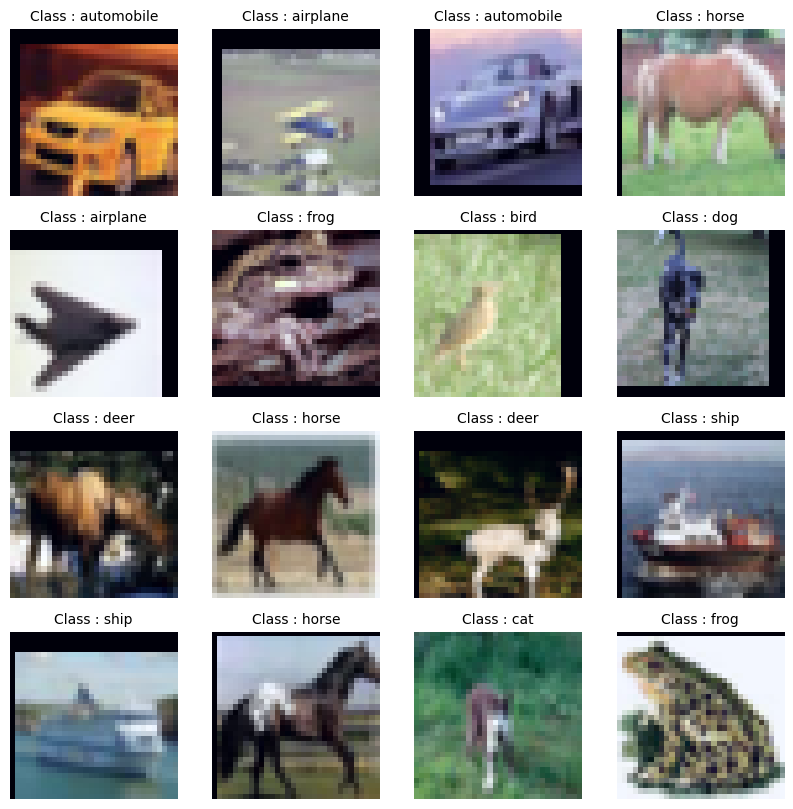

In [2]:
rand_idx = random.sample(range(len(dataset)),k=16)
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
plt.figure(figsize=(10,10))

for i , idx in enumerate(rand_idx):
    img, label = dataset[idx]["img"], dataset[idx]["label"]

    #the image tensor's range is not between 0 and 1,so we have to temporarily scale the tensor values into range 0 and 1 to prevent error.
    img = (img - img.min()) / (img.max() - img.min())

    img_class = class_names[label]

    plt.subplot(4,4,i+1)
    plt.imshow(img.permute(1,2,0))
    plt.title(f"Class : {img_class}",fontsize=10)
    plt.axis(False)


In [1]:
from torch.utils.data import random_split
from cifar10 import cifar10
from resnet_config import ResNetCIFAR10Config, ResNetCIFAR10TrainConfig
all_train_data = cifar10("train")
train_size = int(0.9*len(all_train_data))
val_size = len(all_train_data) - train_size
test_set = cifar10("test")
train_set, val_set = random_split(all_train_data,[train_size,val_size])
train_config = ResNetCIFAR10TrainConfig()
model_config = ResNetCIFAR10Config()


In [2]:
from train import Trainer
trainer = Trainer(train_set, val_set, test_set,train_config, model_config)
trainer.train()

No of parameters in the model: 855760


  0%|          | 0/64000 [00:00<?, ?it/s]/home/varun/projects/experiments-with-gpt2/vision_models/train.py:129: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_loss += self.criterion(train_logits,torch.tensor(train_batch["label"]).to(self.train_config.device))
/home/varun/projects/experiments-with-gpt2/vision_models/train.py:148: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(batch["label"]).to(self.train_config.device)
  0%|          | 1/64000 [00:23<418:15:46, 23.53s/it]

Step:0
Train Loss:2.3060240745544434
Validation Loss:2.306224822998047
Test Error:0.8999999761581421


  3%|▎         | 2000/64000 [03:54<1:43:00, 10.03it/s]

Step:2000
Train Loss:0.9687312841415405
Validation Loss:1.0178645849227905
Test Error:0.3379000425338745


  3%|▎         | 2001/64000 [04:05<75:14:45,  4.37s/it]

Saving checkpoint to out/resnet-56/resnet_ckpt_cifar.pt


  6%|▋         | 4000/64000 [07:34<1:38:26, 10.16it/s] 

Step:4000
Train Loss:0.5397552251815796
Validation Loss:0.5956881046295166
Test Error:0.20560002326965332


  6%|▋         | 4001/64000 [07:46<75:42:33,  4.54s/it]

Saving checkpoint to out/resnet-56/resnet_ckpt_cifar.pt


  9%|▉         | 5999/64000 [11:04<1:42:02,  9.47it/s] 

Step:6000
Train Loss:0.45164671540260315
Validation Loss:0.5373768210411072
Test Error:0.17350000143051147


  9%|▉         | 6001/64000 [11:29<67:49:29,  4.21s/it]

Saving checkpoint to out/resnet-56/resnet_ckpt_cifar.pt


 12%|█▎        | 8000/64000 [14:51<1:37:21,  9.59it/s] 

Step:8000
Train Loss:0.3531247675418854
Validation Loss:0.45949479937553406
Test Error:0.1600000262260437


 13%|█▎        | 8001/64000 [15:16<116:45:16,  7.51s/it]

Saving checkpoint to out/resnet-56/resnet_ckpt_cifar.pt


 16%|█▌        | 9999/64000 [18:50<1:28:28, 10.17it/s]  

Step:10000
Train Loss:0.2711566984653473
Validation Loss:0.42591747641563416
Test Error:0.13120001554489136


 16%|█▌        | 10001/64000 [18:59<55:34:34,  3.71s/it]

Saving checkpoint to out/resnet-56/resnet_ckpt_cifar.pt


 19%|█▊        | 11999/64000 [22:30<1:25:21, 10.15it/s] 

Step:12000
Train Loss:0.24515126645565033
Validation Loss:0.39977923035621643
Test Error:0.12810003757476807


 19%|█▉        | 12001/64000 [22:41<53:25:46,  3.70s/it]

Saving checkpoint to out/resnet-56/resnet_ckpt_cifar.pt


 22%|██▏       | 13999/64000 [26:10<1:23:09, 10.02it/s] 

Step:14000
Train Loss:0.2962043285369873
Validation Loss:0.4358113408088684
Test Error:0.14560002088546753


 22%|██▏       | 14001/64000 [26:24<62:51:57,  4.53s/it]

Saving checkpoint to out/resnet-56/resnet_ckpt_cifar.pt


 25%|██▌       | 16000/64000 [29:44<1:20:10,  9.98it/s] 

Step:16000
Train Loss:0.2698304057121277
Validation Loss:0.4605022370815277
Test Error:0.13910001516342163


 25%|██▌       | 16001/64000 [30:08<81:47:35,  6.13s/it]

Saving checkpoint to out/resnet-56/resnet_ckpt_cifar.pt


 28%|██▊       | 18000/64000 [33:28<1:17:38,  9.87it/s] 

Step:18000
Train Loss:0.2638790011405945
Validation Loss:0.4223826229572296
Test Error:0.14869999885559082


 28%|██▊       | 18001/64000 [33:52<94:13:02,  7.37s/it]

Saving checkpoint to out/resnet-56/resnet_ckpt_cifar.pt


 31%|███       | 19999/64000 [37:24<1:12:35, 10.10it/s] 

Step:20000
Train Loss:0.17684869468212128
Validation Loss:0.36509302258491516
Test Error:0.11550003290176392


 31%|███▏      | 20001/64000 [37:35<45:41:13,  3.74s/it]

Saving checkpoint to out/resnet-56/resnet_ckpt_cifar.pt


 34%|███▍      | 22000/64000 [41:04<1:08:58, 10.15it/s] 

Step:22000
Train Loss:0.16649958491325378
Validation Loss:0.35756155848503113
Test Error:0.10980004072189331


 34%|███▍      | 22001/64000 [41:17<50:36:06,  4.34s/it]

Saving checkpoint to out/resnet-56/resnet_ckpt_cifar.pt


 37%|███▋      | 23999/64000 [44:44<1:06:07, 10.08it/s] 

Step:24000
Train Loss:0.21949060261249542
Validation Loss:0.392159640789032
Test Error:0.13590002059936523


 38%|███▊      | 24001/64000 [44:59<41:28:26,  3.73s/it]

Saving checkpoint to out/resnet-56/resnet_ckpt_cifar.pt


 41%|████      | 26000/64000 [48:30<1:02:32, 10.13it/s] 

Step:26000
Train Loss:0.22159188985824585
Validation Loss:0.41127410531044006
Test Error:0.12770003080368042


 41%|████      | 26001/64000 [48:40<45:52:54,  4.35s/it]

Saving checkpoint to out/resnet-56/resnet_ckpt_cifar.pt


 44%|████▎     | 27999/64000 [52:10<58:26, 10.27it/s]   

Step:28000
Train Loss:0.19808177649974823
Validation Loss:0.3997775614261627
Test Error:0.1193000078201294


 44%|████▍     | 28001/64000 [52:22<37:02:32,  3.70s/it]

Saving checkpoint to out/resnet-56/resnet_ckpt_cifar.pt


 47%|████▋     | 30000/64000 [55:54<56:11, 10.08it/s]   

Step:30000
Train Loss:0.1885358989238739
Validation Loss:0.3574601709842682
Test Error:0.11980003118515015


 47%|████▋     | 30001/64000 [56:06<41:04:06,  4.35s/it]

Saving checkpoint to out/resnet-56/resnet_ckpt_cifar.pt


 50%|████▉     | 31999/64000 [59:34<52:01, 10.25it/s]   

Step:32000
Train Loss:0.17981381714344025
Validation Loss:0.3752000331878662
Test Error:0.11810004711151123


 50%|█████     | 32001/64000 [59:46<32:45:56,  3.69s/it]

Saving checkpoint to out/resnet-56/resnet_ckpt_cifar.pt


 53%|█████▎    | 34000/64000 [1:03:15<49:01, 10.20it/s] 

Step:34000
Train Loss:0.020983470603823662
Validation Loss:0.25730687379837036
Test Error:0.07400000095367432
Saving checkpoint to out/resnet-56/resnet_ckpt_cifar.pt


 56%|█████▋    | 36000/64000 [1:07:00<45:57, 10.15it/s]   

Step:36000
Train Loss:0.01494792103767395
Validation Loss:0.2970089316368103
Test Error:0.07620000839233398


 56%|█████▋    | 36001/64000 [1:07:10<33:42:38,  4.33s/it]

Saving checkpoint to out/resnet-56/resnet_ckpt_cifar.pt


 59%|█████▉    | 38000/64000 [1:10:40<42:38, 10.16it/s]   

Step:38000
Train Loss:0.00993852224200964
Validation Loss:0.3356883227825165
Test Error:0.07620000839233398


 59%|█████▉    | 38001/64000 [1:10:51<31:17:06,  4.33s/it]

Saving checkpoint to out/resnet-56/resnet_ckpt_cifar.pt


 62%|██████▏   | 39999/64000 [1:14:20<38:56, 10.27it/s]   

Step:40000
Train Loss:0.007334434427320957
Validation Loss:0.37211498618125916
Test Error:0.07600003480911255


 63%|██████▎   | 40001/64000 [1:14:30<24:39:12,  3.70s/it]

Saving checkpoint to out/resnet-56/resnet_ckpt_cifar.pt


 66%|██████▌   | 42000/64000 [1:18:00<36:18, 10.10it/s]   

Step:42000
Train Loss:0.008137348107993603
Validation Loss:0.39480507373809814
Test Error:0.0789000391960144


 66%|██████▌   | 42001/64000 [1:18:12<26:39:34,  4.36s/it]

Saving checkpoint to out/resnet-56/resnet_ckpt_cifar.pt


 69%|██████▊   | 43999/64000 [1:21:40<32:29, 10.26it/s]   

Step:44000
Train Loss:0.006350111681967974
Validation Loss:0.38874468207359314
Test Error:0.0756000280380249


 69%|██████▉   | 44001/64000 [1:21:53<20:38:25,  3.72s/it]

Saving checkpoint to out/resnet-56/resnet_ckpt_cifar.pt


 72%|███████▏  | 46000/64000 [1:25:25<29:22, 10.21it/s]   

Step:46000
Train Loss:0.005601455457508564
Validation Loss:0.4142347276210785
Test Error:0.07620000839233398


 72%|███████▏  | 46001/64000 [1:25:34<21:37:01,  4.32s/it]

Saving checkpoint to out/resnet-56/resnet_ckpt_cifar.pt


 75%|███████▌  | 48000/64000 [1:28:52<26:39, 10.00it/s]   

Step:48000
Train Loss:0.003515684511512518
Validation Loss:0.4505757689476013
Test Error:0.07520002126693726


 75%|███████▌  | 48001/64000 [1:29:16<25:37:29,  5.77s/it]

Saving checkpoint to out/resnet-56/resnet_ckpt_cifar.pt


 78%|███████▊  | 49999/64000 [1:32:34<23:29,  9.93it/s]   

Step:50000
Train Loss:0.0011938216630369425
Validation Loss:0.4569052755832672
Test Error:0.07130002975463867


 78%|███████▊  | 50001/64000 [1:32:58<20:57:31,  5.39s/it]

Saving checkpoint to out/resnet-56/resnet_ckpt_cifar.pt


 81%|████████▏ | 52000/64000 [1:36:30<19:52, 10.06it/s]   

Step:52000
Train Loss:0.0005070733022876084
Validation Loss:0.43400317430496216
Test Error:0.07140004634857178


 81%|████████▏ | 52001/64000 [1:36:39<14:32:49,  4.36s/it]

Saving checkpoint to out/resnet-56/resnet_ckpt_cifar.pt


 84%|████████▍ | 54000/64000 [1:40:10<16:22, 10.18it/s]   

Step:54000
Train Loss:0.0009432052029296756
Validation Loss:0.43510496616363525
Test Error:0.07120001316070557


 84%|████████▍ | 54001/64000 [1:40:21<12:11:38,  4.39s/it]

Saving checkpoint to out/resnet-56/resnet_ckpt_cifar.pt


 87%|████████▋ | 55999/64000 [1:43:50<13:05, 10.19it/s]   

Step:56000
Train Loss:0.0006864291499368846
Validation Loss:0.4291565716266632
Test Error:0.07109999656677246


 88%|████████▊ | 56001/64000 [1:44:02<8:13:37,  3.70s/it]

Saving checkpoint to out/resnet-56/resnet_ckpt_cifar.pt


 91%|█████████ | 58000/64000 [1:47:18<10:04,  9.93it/s]  

Step:58000
Train Loss:0.0009658472263254225
Validation Loss:0.4725203514099121
Test Error:0.06980001926422119


 91%|█████████ | 58001/64000 [1:47:42<10:58:30,  6.59s/it]

Saving checkpoint to out/resnet-56/resnet_ckpt_cifar.pt


 94%|█████████▍| 60000/64000 [1:51:00<06:43,  9.92it/s]   

Step:60000
Train Loss:0.0004339999577496201
Validation Loss:0.4715535640716553
Test Error:0.07109999656677246


 94%|█████████▍| 60001/64000 [1:51:24<8:09:31,  7.34s/it]

Saving checkpoint to out/resnet-56/resnet_ckpt_cifar.pt


 97%|█████████▋| 61999/64000 [1:54:55<03:16, 10.18it/s]  

Step:62000
Train Loss:0.00026570080081000924
Validation Loss:0.501592218875885
Test Error:0.07130002975463867


 97%|█████████▋| 62001/64000 [1:55:06<2:03:40,  3.71s/it]

Saving checkpoint to out/resnet-56/resnet_ckpt_cifar.pt


100%|██████████| 64000/64000 [1:58:23<00:00,  9.01it/s]  


In [3]:
from eval import Eval
from cifar10 import cifar10
from resnet_config import ResNetTestConfig, ResNetCIFAR10Config
evaluator = Eval(test_set=cifar10("test"),eval_config=ResNetTestConfig(),model_config=ResNetCIFAR10Config)
evaluator.evaluate()

ImportError: cannot import name 'ResNetConfig' from 'resnet_config' (/home/varun/projects/experiments-with-gpt2/vision_models/resnet_config.py)